In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

Untitled.ipynb   forex-rates.csv


In [3]:
#read the csv file!
df = pd.read_csv('./forex-rates.csv')

In [4]:
df.head(10)

,Date,Canadian/US,Japanese/US
0,1979-12-31,1.17,240.30
1,1980-01-02,1.17,238.45
2,1980-01-03,1.17,238.35
3,1980-01-04,1.17,234.80
4,1980-01-07,1.17,231.55
5,1980-01-08,1.17,234.75
6,1980-01-09,1.17,234.95
7,1980-01-10,1.17,235.80
8,1980-01-11,1.17,236.05
9,1980-01-14,1.17,236.20


In [5]:
df['Canadian/US'].head()

0    1.17
1    1.17
2    1.17
3    1.17
4    1.17
Name: Canadian/US, dtype: object

In [6]:
# convert "object" to "float": ERROR!
df['Canadian/US'] = df['Canadian/US'].astype(float)

ValueError: could not convert string to float: ' 31 December 1979 ? 31 December 1998'

In [8]:
# Find the index of the "string"
df['Canadian/US'].index[df['Canadian/US'] == ' 31 December 1979 ? 31 December 1998']

Int64Index([4774], dtype='int64')

In [9]:
# Check the row!
df.iloc[4774]

Date                   Daily foreign exchange rates
Canadian/US     31 December 1979 ? 31 December 1998
Japanese/US                                     NaN
Name: 4774, dtype: object

In [12]:
# trim the dataframe and save it to new one
df_new = df[:4774]

In [14]:
# convert "object" to "float": Worked!
df_new['Canadian/US']= df_new['Canadian/US'].astype(float)

/Users/hwanpyokim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
# check the 'Date' column
df_new['Date'].head(10)

0    1979-12-31
1    1980-01-02
2    1980-01-03
3    1980-01-04
4    1980-01-07
5    1980-01-08
6    1980-01-09
7    1980-01-10
8    1980-01-11
9    1980-01-14
Name: Date, dtype: object

In [19]:
# convert "object" to "datetime": Worked!
df_new['Date_new'] = pd.to_datetime(df_new['Date'], format='%Y-%m-%d')

/Users/hwanpyokim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df_new['Date_new'].head(10)

0   1979-12-31
1   1980-01-02
2   1980-01-03
3   1980-01-04
4   1980-01-07
5   1980-01-08
6   1980-01-09
7   1980-01-10
8   1980-01-11
9   1980-01-14
Name: Date_new, dtype: datetime64[ns]

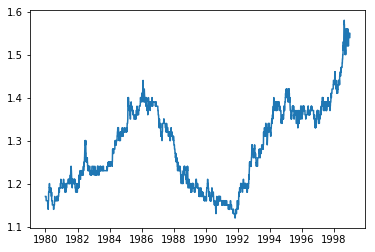

In [22]:
plt.plot(df_new['Date_new'], df_new['Canadian/US'])
plt.show()

In [23]:
# convert "object" to "float": Worked!
df_new['Japanese/US']= df_new['Japanese/US'].astype(float)

/Users/hwanpyokim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


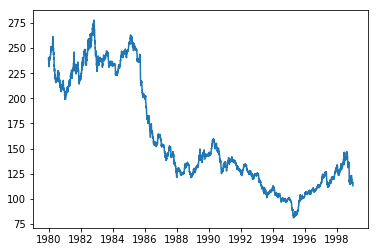

In [24]:
plt.plot(df_new['Date_new'], df_new['Japanese/US'])
plt.show()

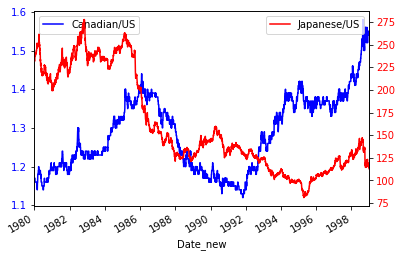

In [36]:
# plot two columns with two diffrent scaled y-axis
fig, ax1 = plt.subplots()
df_new.plot(x = 'Date_new', y = 'Canadian/US', ax = ax1, color = 'b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
df_new.plot(x = 'Date_new', y = 'Japanese/US', ax = ax2, color = 'r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()

In [47]:
# Calculate the correlation matrix between the two columns
df_new_corr = df_new.corr()
print(df_new_corr)

             Canadian/US  Japanese/US
Canadian/US     1.000000    -0.270442
Japanese/US    -0.270442     1.000000


In [54]:
print('The correlation between Canadian/US and Japanes/US is ', df_new_corr.iloc[0,1])

The correlation between Canadian/US and Japanes/US is  -0.270442424709
